In [2]:
#https://www.kaggle.com/c/costa-rican-household-poverty-prediction/data

# <font color="#2086BA">1. Importing packages and Data</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import gc

%matplotlib inline

In [2]:
folderPath = "D:/Rep/MyLearning/competitions/kaggle/CostoRiconHVP";

In [3]:
fileName = "train.csv"
df_train = pd.read_csv(os.path.join(folderPath,fileName))

In [4]:
fileName = "test.csv"
df_test = pd.read_csv(os.path.join(folderPath,fileName))

In [5]:
data = pd.concat([df_train,df_test])

In [6]:
data.head()

,Id,SQBage,SQBdependency,SQBedjefe,SQBescolari,SQBhogar_nin,SQBhogar_total,SQBmeaned,SQBovercrowding,Target,...,television,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,v14a,v18q,v18q1,v2a1
0,ID_279628684,1849,0.0,100,100,0,1,100.0,1.000000,4.0,...,0,0,0,1,0,0,1,0,NaN,190000.0
1,ID_f29eb3ddd,4489,64.0,144,144,0,1,144.0,1.000000,4.0,...,0,0,0,1,0,0,1,1,1.0,135000.0
2,ID_68de51c94,8464,64.0,0,121,0,1,121.0,0.250000,4.0,...,0,1,0,0,0,0,1,0,NaN,NaN
3,ID_d671db89c,289,1.0,121,81,4,16,121.0,1.777778,4.0,...,0,0,0,1,0,0,1,1,1.0,180000.0
4,ID_d56d6f5f5,1369,1.0,121,121,4,16,121.0,1.777778,4.0,...,0,0,0,1,0,0,1,1,1.0,180000.0


# <font color="#2086BA">2. Data Cleaning and Transformation</font> 

In [7]:
missing_df = data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')
missing_df

,column_name,missing_count
7,SQBmeaned,36
77,meaneduc,36
9,Target,23856
142,v2a1,24263
141,v18q1,25468
120,rez_esc,27581


In [17]:
print('Shape of train data :',df_train.shape)
print('Shape of train data :',df_test.shape)

Shape of train data : (9557, 143)
Shape of train data : (23856, 142)


In [20]:
print('Number of household in train data:',df_train['idhogar'].nunique())
print('Number of household in test data:',df_test['idhogar'].nunique())

Number of household in train data: 2988
Number of household in test data: 7352


In [23]:
print('Number of head of families in train data :',df_train['parentesco1'].sum())
print('Number of head of families in test data:',df_test['parentesco1'].sum())

Number of head of families in train data : 2973
Number of head of families in test data: 7334


In [25]:
familyheads = data.groupby('idhogar').agg({'parentesco1':'sum'}).reset_index()
familyheads.columns = ['idhogar','numberofheads']

In [29]:
print('The number of families with no heads:',len(familyheads[familyheads['numberofheads']==0]))

The number of families with no heads: 33


In [48]:
data['meaneduc'].fillna(0,inplace=True)
data['SQBmeaned'].fillna(0,inplace=True)
data['v18q1'].fillna(0,inplace=True)
data['rez_esc'].fillna(0,inplace=True)
data['v2a1'].fillna(0,inplace=True)

In [34]:
datatypes = data.dtypes.reset_index()
datatypes.columns = ["Count", "Column Type"]
datatypes[datatypes['Column Type']=='object']

,Count,Column Type
0,Id,object
21,dependency,object
23,edjefa,object
24,edjefe,object
60,idhogar,object


In [8]:
data.drop(['dependecy','edjefa','edjefe','SQBescolari','SQBage','SQBhogar_total','SQBedjefe','SQBhogar_nin','SQBovercrowding','SQBdependency','SQBmeaned','agesq'],inplace=True)

# <font color="#2086BA">3. Data Exploration</font> 

### <font color="#2893D5">1. Effect of luxury items</font> 

In [36]:
#Refrigerator - refrig
temp1 = df_train['refrig'].value_counts().reset_index()
temp2 = df_train.pivot_table(values="refrig",index="Target",aggfunc=lambda x:x.mean()).reset_index()
temp3 = pd.crosstab(df_train['refrig'], df_train['Target'])
print('Frequency table for refrig')
print(temp1)

print('Probability of having Refrigerator for each Target class')
print(temp2)

Frequency table for refrig
   index  refrig
0      1    9152
1      0     405
Probability of having Refrigerator for each Target class
   Target    refrig
0       1  0.887417
1       2  0.928616
2       3  0.961952
3       4  0.973316


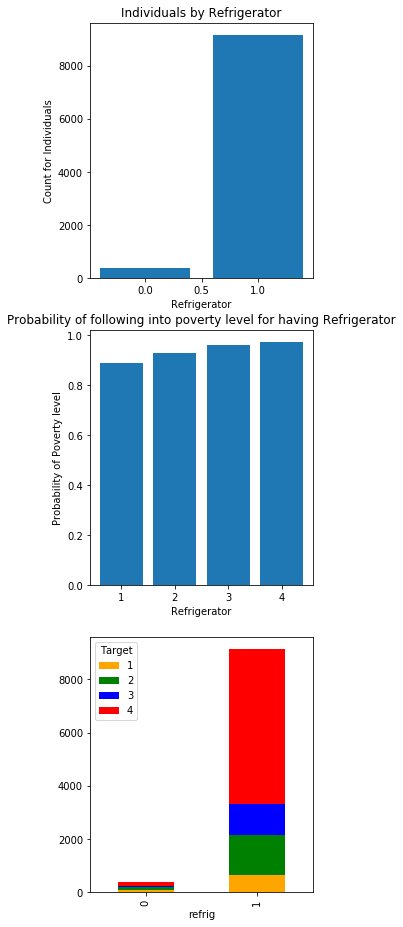

In [37]:
fig = plt.figure(figsize=(4,16))
ax1 = fig.add_subplot(311)
ax1.set_xlabel('Refrigerator')
ax1.set_ylabel('Count for Individuals')
ax1.set_title("Individuals by Refrigerator")
ax1.bar(temp1['index'],temp1['refrig']) #.plot(kind='bar')

ax2 = fig.add_subplot(312)
ax2.set_xlabel('Refrigerator')
ax2.set_ylabel('Probability of Poverty level')
ax2.set_title("Probability of following into poverty level for having Refrigerator")
ax2.bar(temp2['Target'],temp2['refrig']) #.plot(kind = 'bar')

ax3 = fig.add_subplot(313)
temp3.plot(kind='bar', stacked=True, color=['orange','green','blue','red'], grid=False,ax=ax3)
plt.show()
del(temp1)
del(temp2)
del(temp3)

In [68]:
temp1 = df_train.groupby('idhogar').agg({'refrig':'sum','Id':'count'}).reset_index()
print('If Refrigerator count is fine within family:',len(temp1[(temp1['refrig']!=temp1['Id']) & (temp1['refrig']>0)])==0)
del(temp1)
print('Refrigerator looks to have very little effect on povery levels')

If Refrigerator count is fine within family: True
Refrigerator looks to have very little effect on povery levels


In [67]:
table1 = df_train.pivot_table(index=["refrig"],columns='Target',values='Id', aggfunc=len, margins=True, dropna=True,fill_value=0)
print(table1.div(table1.iloc[:,-1], axis=0))
del(table1)
print('For all people having refrigerators only 7 % fall into extreme poverty while 63% are in good condition')
print('while of all people not having refrigerators onl 20% fall into extreme poverty while 40% are in good condition')

Target         1         2         3         4  All
refrig                                             
0       0.209877  0.281481  0.113580  0.395062  1.0
1       0.073208  0.162041  0.127076  0.637675  1.0
All     0.079000  0.167103  0.126504  0.627394  1.0
For all people having refrigerators only 7 % fall into extreme poverty while 63% are in good condition
while of all people not having refrigerators onl 20% fall into extreme poverty while 40% are in good condition


In [ ]:
data['peopleinhousehold'] = data['bedrooms'] * data['overcrowding']
data['peopleinhousehold'] = data['peopleinhousehold'].astype(np.int8)
print('Difference between total individuals in household and bedrooms * no. of people per household :',len(data[data['hogar_total']!=data['peopleinhousehold']][['hogar_total','peopleinhousehold']]))
print('Difference between total individuals in household is greater than number of people in house :',len(data[data['hogar_total']>data['peopleinhousehold']][['hogar_total','peopleinhousehold']]))
print('Difference between total individuals in household is less than number of people in house :',len(data[data['hogar_total']<data['peopleinhousehold']][['hogar_total','peopleinhousehold']]))
data.drop(['peopleinhousehold'],inplace=True)

print('This shows a possibility that more than one family lives in same house and members of same family lives in different houses.')

In [13]:
#Since hhsize and tamhog are same
data.drop(['tamhog'],inplace=True)

In [16]:
#Since overcrowding capture both so don't think 'hacdor','hacapo' is required
data.drop(['hacdor','hacapo'],inplace=True)

# <font color="#2086BA">4. Feature Engineering</font> 

# <font color="#2086BA">5. Predictive Modelling</font> 

In [65]:
prediction_var = [x for x in df_train.columns if x not in ['Id','dependency','edjefa','edjefe','idhogar','parentesco1','Target']]
target_var = 'Target'

In [71]:
train = data[(data[target_var].notnull())]
test = data[(data[target_var].isnull())]
test.drop(['Target'],axis=1,inplace=True)

C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn import metrics
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(data.shape[0], n_folds=5)
    error = []
    for train, test in kf:
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

        #Fit the model again so that it can be refered outside the function:
        model.fit(data[predictors],data[outcome]) 

In [73]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classification_model(model,train,prediction_var,target_var)

Accuracy : 65.732%
Cross-Validation Score : 76.778%
Cross-Validation Score : 74.242%
Cross-Validation Score : 71.315%
Cross-Validation Score : 67.641%
Cross-Validation Score : 65.312%


In [74]:
len(test)

23856

In [79]:
test["Target"] = model.predict(test[prediction_var])
test[["Id","Target"]].to_csv(os.path.join(folderPath,"CostaRiconPovertyPrediction_LR_12092018.csv"),index=False)

C:\Users\Inspiron\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# <font color="#2086BA">6. Evaluation</font> 

In [82]:
test[["Id","Target"]].dtypes

Id         object
Target    float64
dtype: object